![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)
This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA

In [1]:
import matplotlib.pyplot as plt
from time import time

# Medindo o tempo usando `time`

Escreva uma função `tempo_pow(b,e)` que retorna
- o valor de `b**e`,
- o tempo que foi gasto para este cálculo, usando a função `time`. 

In [2]:
def tempo_pow(b,e):
    ### Resposta aqui


Teste que ela está funcionando:

In [3]:
tempo_pow(2,10), tempo_pow(2,20), tempo_pow(2,30)

((1024, 1.6689300537109375e-06),
 (1048576, 4.76837158203125e-07),
 (1073741824, 4.76837158203125e-07))

Há alguma diferença entre estes tempos?

### Outras bases

Ainda usando "números pequenos", veja que `tempo_pow` funciona para outras bases e expoentes

# Armazenando valores

Vamos calcular potências até expoente 1000, para as bases 2,3,4,5,7.

Comece usando uma _list comprehension_ para criar uma lista com as potências `3**e`.

In [4]:
Expoentes = range(1000)

In [5]:
### Resposta aqui


Analogamente, use uma _list comprehension_ para criar uma lista que tem (apenas!) o tempo de cálculo de `3**e`,
usando sua função `tempo_pow`.

In [6]:
### Resposta aqui


Com uma lista, podemos fazer um gráfico!
Qual o tempo que leva, em função do expoente?

In [7]:
### Resposta aqui


O que você percebe?

Faça também um gráfico do tempo em função do _resultado_.
(É por conta deste tipo de gráfico que a `tempo_pow` retorna já os dois valores;
quando calcular potências ficar de fato demorado, no final do notebook, não vamos querer calcular 2 vezes!)

In [8]:
### Resposta aqui


OverflowError: int too large to convert to float

Se tudo deu certo, você **não** conseguiu fazer o gráfico anterior.
Em vez disso, use `log()` e faça um gráfico do tempo em função do logaritmo do resultado...

In [9]:
from math import log

In [10]:
### Resposta aqui


## Armazenando mais valores

Agora, use uma **dupla** _list comprehension_ para criar uma matriz `valores` com a lista das potências `b**e` para cada base, e para cada expoente.

Note que `valores[i][j]` deve ser igual a `Bases[i]**Expoentes[j]`.

In [11]:
Bases = [2,3,4,5,7]

In [12]:
### Resposta aqui


In [13]:
i = 2
j = 5
assert valores[i][j] == Bases[i]**Expoentes[j]
assert valores[i][j] == Bases[i]**j

Mas talvez seja mais interessante que `m` seja um dicionário de listas:
`m[b] =` lista das potências `b**j`.

Substitua a _list comprehension_ por um _dict comprehension_ que faça isso.
É bem provável que a solução tenha que mudar apenas **2** caracteres, e incluir outros 2.

In [14]:
valores = {b:[b**e for e in Expoentes] for b in Bases}

In [15]:
assert valores[3][10] == 3**10

In [16]:
from numpy.random import randint, seed

In [17]:
seed(1)
for b in Bases:
    for e in randint(0,1000,size=10):
        assert valores[b][e] == b**int(e), (b, e, valores[b][e], b**e)

Bom, agora crie a _dict comprehension_ `tempos` que vai ter em cada entrada a lista dos **tempos** de cálculo de `b**j`.

In [18]:
### Resposta aqui


Se tudo deu certo, o gráfico abaixo ficará com uma legenda bonitinha (mas provavelmente só a legenda):

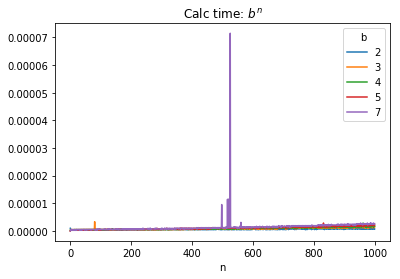

In [19]:
for b in Bases:
    plt.plot(Expoentes, tempos[b], label="{}".format(b))
plt.legend(loc=0, title='b')
plt.title('Calc time: $b^n$')
plt.xlabel('n')
plt.show()

## Melhorando os gráficos

Algumas ideias:
- Em vez de usar expoentes de 0 a 1000, use de 0 a 10000, de 20 em 20.
- Em vez de medir o tempo de calcular `b**e`, meça o tempo de calcular isso 3 vezes.
- Ou `n` vezes, e adicione um argumento em `tempo_pow`.

E enfim, não deixe de fazer um gráfico também comparando o valor do resultado com o tempo necessário para calculá-lo.

In [20]:
### Resposta aqui


# Descobrindo tendências

Olhando para as potências de 3, tente descobrir uma função da forma $f(e) = C e^\alpha$
tal que o tempo de cálculo de `3**e` seja bem aproximado por $f(e)$.

Dica: ache primeiro o valor de $\alpha$ "experimentalmente", e depois tente _calcular_ um "bom" valor de C.

Repita este processo para as outras potências.
Todas elas têm o mesmo comportamento?

## Testando a tendência

Veja se a sua fórmula dá valores bons para o tempo relativo a expoentes entre 20000 e 30000.
(Não precisa testar todos!)

Este é o teste fundamental para você ter "certeza" de que sua teoria - ou seja, a função $f(e)$ - está certa!

# `str(b**e)`

Agora, faça "tudo de novo" para o tempo que levamos  para converter `b**e` em string.
Cuidado para _não_ incluir no tempo de cálculo o tempo necessário para calcular o valor `b**e` ;-)